# Feature Importance

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from price_prediction_helper import cross_val_scores
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#Importing data

data = pd.read_csv('processed_classification_data_montreal.csv') 
data.shape


(21093, 53)

In [3]:
data.head()

,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,...,strict_14_with_grace_period,super_strict_30,super_strict_60,Neighbourhood_0,Neighbourhood_1,Neighbourhood_2,Neighbourhood_3,Neighbourhood_4,Neighbourhood_5,Neighbourhood_6
0,4111,0,1.0,1,1,2,2,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,4111,0,6.0,1,1,2,2,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,3648,1,1.0,1,0,3,4,1.0,1.0,1.0,...,1,0,0,0,0,0,1,0,0,0
3,3478,0,3.0,1,1,3,4,1.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,3478,0,3.0,1,1,3,5,1.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [4]:

X = data.drop(columns=['host_is_superhost'])
y = data.host_is_superhost

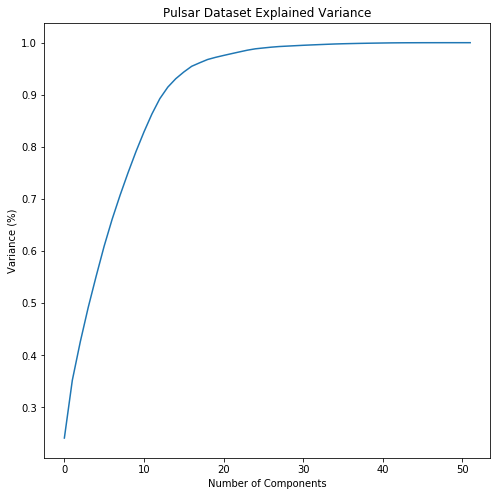

In [5]:
from sklearn.decomposition import PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()


In [6]:
pca = PCA(n_components=35)
print(data_rescaled)
dataset = pca.fit_transform(data_rescaled)

principalDf = pd.DataFrame(data = dataset
             , columns =[str('pca')+ str(x) for x in range(35)])
principalDf = pd.concat([principalDf, data['host_is_superhost']], axis = 1)
principalDf.to_csv('processed_classification_data_montreal_pca.csv',index=False)


[[1.00000000e+00 8.80281690e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.28169014e-03 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.84538653e-01 8.80281690e-04 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.71571072e-01 9.41901408e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.71571072e-01 9.41901408e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.63341646e-02 1.76056338e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


## Feature Importance using Random Forest

In [7]:

X = data.drop(columns=['host_is_superhost'])
y = data.host_is_superhost
temp_data = data.drop(columns=['host_is_superhost'])

X = MinMaxScaler().fit_transform(X)

clf = RandomForestClassifier(n_estimators=10,random_state=0, n_jobs = -1)
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
    
best_features = ['label']
for i in range(X.shape[1]):
    best_features.append(temp_data.columns[indices[i]])
print(best_features)

feature_importances = np.sort(clf.feature_importances_)[::-1]
print(len(feature_importances))

['label', 'number_of_reviews_ltm', 'review_scores_rating', 'number_of_reviews', 'reviews_per_month', 'host_listings_count', 'host_since', 'availability_90', 'price', 'availability_365', 'review_scores_cleanliness', 'cleaning_fee', 'availability_30', 'minimum_nights', 'availability_60', 'security_deposit', 'review_scores_communication', 'review_scores_value', 'accommodates', 'review_scores_accuracy', 'guests_included', 'review_scores_checkin', 'beds', 'Parking', 'bedrooms', 'Safety features', 'bathrooms', 'Facilities', 'host_identity_verified', 'review_scores_location', 'Neighbourhood_3', 'strict_14_with_grace_period', 'instant_bookable', 'flexible', 'moderate', 'Neighbourhood_6', 'room_type', 'is_location_exact', 'Neighbourhood_2', 'Neighbourhood_0', 'luxury_stay', 'basic_stay', 'Neighbourhood_5', 'Neighbourhood_1', 'require_guest_phone_verification', 'Neighbourhood_4', 'require_guest_profile_picture', 'Location', 'bed_type', 'unique_stay', 'Basics', 'super_strict_60', 'super_strict_30

### Visualising the results by plotting Top N features

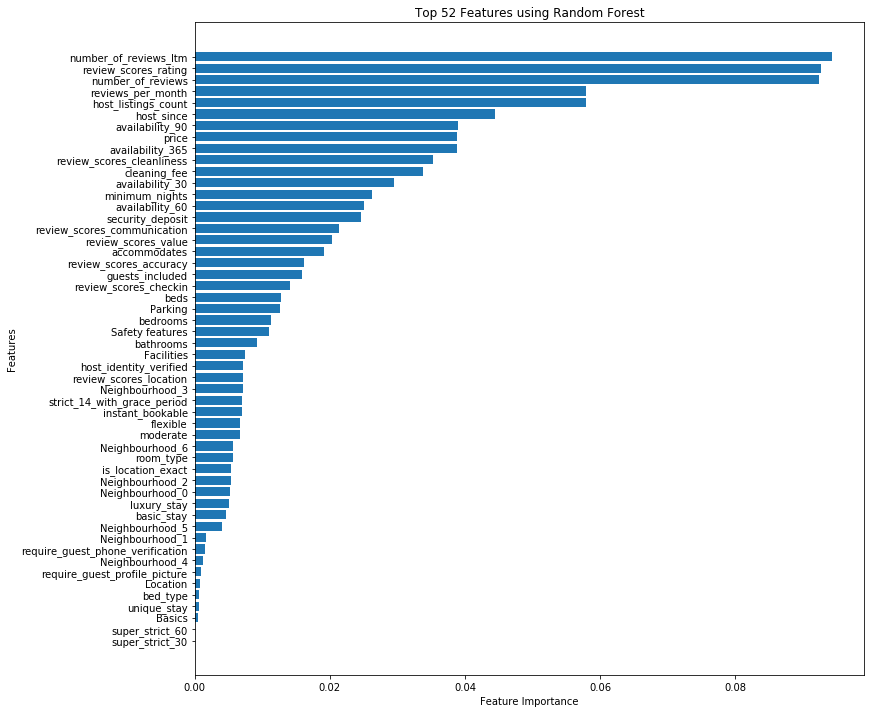

In [8]:
n_best = 52
plt.figure(figsize=(12,12))
#print(len(best_features[:0:-1]))
top_n_features = best_features[n_best+1:0:-1]
top_n_features_imp = feature_importances[n_best::-1]
plt.barh(top_n_features,top_n_features_imp )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top '+str(n_best)+ ' Features using Random Forest')
plt.show()

We can drop the last few features

## Finding optimal number of features

In [9]:
rfecv = RFECV(clf, step=1, cv=5, n_jobs = -1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 45


In [10]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True])

In [11]:
print(np.where(rfecv.support_ == False)[0])

df = data.drop(data.columns[np.where(rfecv.support_ == False)[0]], axis=1)
df.drop('host_is_superhost',axis=1,inplace=True)

[ 9 29 32 35 39 43 44]


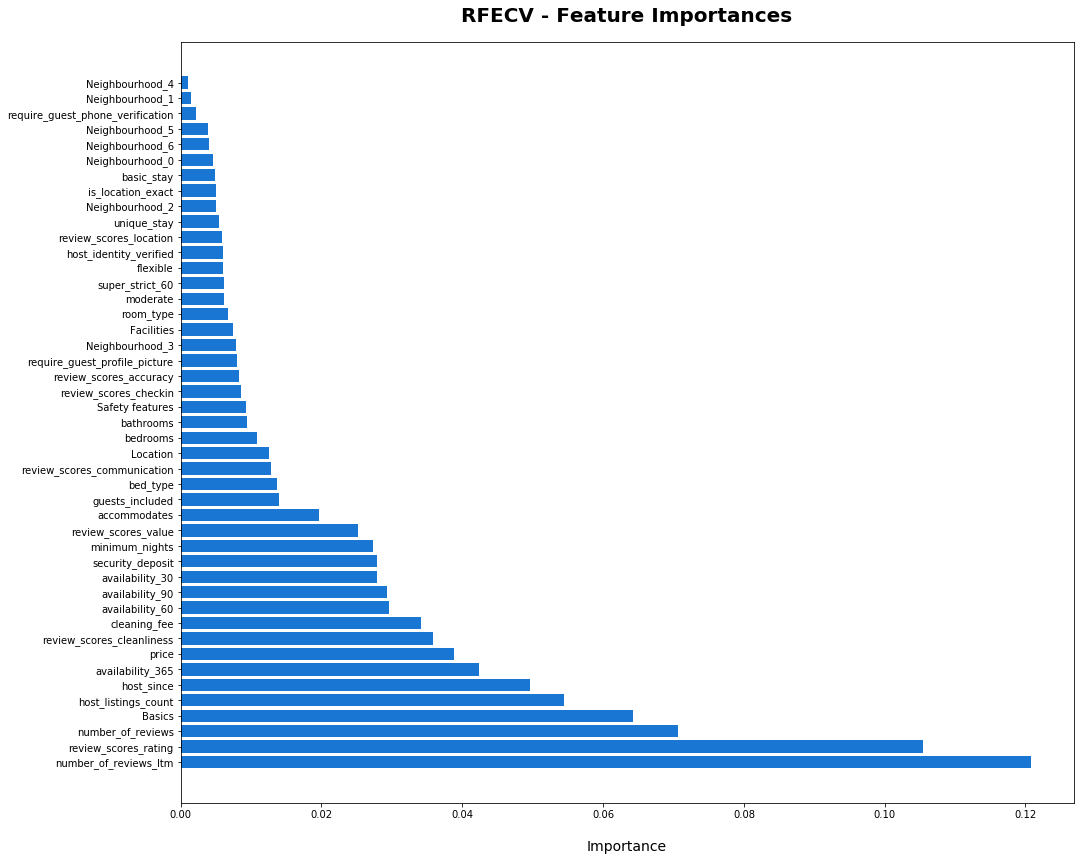

In [12]:
dset = pd.DataFrame()
dset['attr'] = df.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [13]:

X = df
y = data.price
X = MinMaxScaler().fit_transform(X)

clf = LinearRegression()
_,r2_scores,_,_=cross_val_scores('Linear Regression',clf,X,y)

Linear Regression RMSE : 0.00 (+/- 0.00)
Linear Regression R2 Score: 1.00 (+/- 0.00)
